# 1. Linear Algebra

## Problem 3

In this problem, we want to explore a reflection transformation of $X$, which produces a mirror vector $Z$ with respect to vector $V$. See Figure 1.

<img src="./image_files/LA01.png", width = 250>
<center>Figure 1</center>

1) Is a reflection transformation linear?

2) If yes, find matrix $M$ such that $Z = MX$ using concept of projection.

3) If yes, find matrix $M$ such that $Z = MX$ using concept of eigen values and vectors. (you can use the results of the above problems)

3) For $V = \begin{bmatrix} 1 & 1 \end{bmatrix}^T$, compute $M$ and its eigenvalues/eigenvectors (here, vector $V$ is a vector with 45 degree angle with x-axis)

## Problem 5

Let $R = R(\theta)$ be a rotation matrix with a rotational angle of $\theta$ in $\mathbb{R}^n$.

1. Prove that $$R^TR=I \;\text{in}\; \mathbb{R}^n$$
    
    Hint: Euclidian distances of vectors are preserved after a rotational operation. (_i.e._, $\lVert Rx \rVert = \lVert x \rVert$ for any $x \in \mathbb{R}^n$ ) 
<br><br>
2. Prove that $$R^T(\theta) = R^{-1}(\theta) = R(-\theta)\;\text{in}\;\mathbb{R}^n$$
<br><br>
3. Show that column vectors in $R$ are orthogonal in $\mathbb{R}^n$.

## Problem 11

Permutation matrices. A square matrix A is called a permutation matrix if it satisfies the following three properties:

- all elements of A are either zero or one
- each column of A contains exactly one element equal to one
- each row of A contains exactly one element equal to one.

The matrices

$$A_1 = \begin{bmatrix}
0 & 1 & 0\\
0 & 0 & 1 \\
1& 0 & 0 
\end{bmatrix}, \quad
A_2 = \begin{bmatrix}
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0& 1 & 0 \\
1 & 0 & 0 & 0
\end{bmatrix}$$

are examples of permutation matrices. A less formal definition is the following: a permutation matrix is the identity matrix with its rows reordered.

(a) Let A be an $n \times n$ permutation matrix. Give a simple description in words of the relation between a n-vector $x$ and $f(x) = Ax$.

(b) Prove that columns of permutation matrix is orthogonal.

(c) We can also define a second linear function $g(x) = A^Tx$ in terms of the same permutation matrix. What is the relation between $g$ and $f$ ?

Hint: Use the result of (b)

(d) Describe meaning of columns and rows of permutation matrix. Then, explain the result of (c).

# 3. Regression

## Problem 2

The regularized least-squares problem has the form

<br>
$$ \min_{\theta} \;\lVert A\theta -y\rVert_2^2 + \lambda \lVert \theta \rVert_2^2$$

(a) Show that the solution is given by
<br><br>
$$ \hat{\theta} = \left( A^T A + \lambda I_n \right)^{-1} A^T y $$
 (Do not use the method of Lagrangian multipliers)
<br><br>

(b) Write down a gradient descent algorithm for given optimization problem.

(c) Based on the result of (b), describe the role of regularizer term.

(d) Describe results of (a) and (b) have the same meaning.

(e) Find and draw an approximated curve of the given data points in Python using your gradient descent algorithm.
    - overcome overfitting 
    - use RBF 
    - choose a proper value of $\lambda$ on your own

# 4. Classification

## New problem

a) Let's say $x_i$'s are features. We say feature $x_j$ is useless when $P(y|x_1, ... x_{j-1}, x_j, x_j, ... x_N) = P(y|x_1, ... x_{j-1}, x_j, ... x_N)$. Describe the reason.

b) In our class, we learn that we can select meaningful feature using Lasso. Describe why Lasso select meaningful feature using above equation.

c) Load 'data_input.pkl' and 'data_target.pkl'. Using these, build the classifier using Lasso.

d) After applying Lasso, we can select meaningful features. Then, we again apply Lasso to refine our features. Such techniques are called recursive feature elimination. Write the code that recursively apply Lasso to select features and plot the number of features selected at each iteration.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target

from six.moves import cPickle
cPickle.dump(X, open('./data_input.pkl', 'wb'))
cPickle.dump(y, open('./data_target.pkl', 'wb'))

## New problem
(a) The figure shows loss functions of each classifier that you have learned in class.

<img src="./image_files/hinge_.jpg", width = 500>
<center>Figure 1</center>

Observe that the hinge loss function does not impose any loss when the inner product between target and prediction is greater than 1. Actually, support vector machine can be coded by setting classifier's loss to the hinge loss function. Describe the reason using the concept of maximum margin.

(b) Using the figure, describe why support vector machine is robust to outlier.

(c) Write the code that optimizing hinge loss function to build a classifier. Then plot the decision boundary of your classifier.

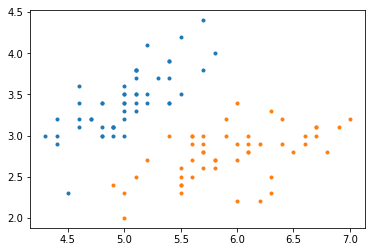

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
x, y = iris.data, iris.target
x = x[y != 2]
y = y[y != 2]
y[y == 0] = -1
x = x[:,:2]

plt.plot(x[y == -1,0], x[y == -1,1], '.')
plt.plot(x[y == 1,0], x[y == 1,1], '.')
plt.show()

# 5. Clustering

## Problem 1

You will use K-means to compress an image by reducing the number of colors it contains.

1) Image Representation

The data for this exercise contains a 128-pixel by 128-pixel TIFF image named "bird.tiff." It looks like the picture in Figure 1.
<br><br>
<img src="./image_files/clus01.bmp", width = 250>
<br><br>
In a straightforward 24-bit color representation of this image, each pixel is represented as three 8-bit numbers (ranging from 0 to 255) that specify red, green and blue (RGB) intensity values. Our bird photo contains thousands of colors, but we'd like to reduce that number to 16. By making this reduction, it would be possible to represent the photo in a more efficient way by storing only the RGB values of the 16 colors present in the image.

In this problem, you will use K-means to reduce the color count to $k = 16$. That is, you will compute 16 colors as the cluster centroids and replace each pixel in the image with its nearest cluster centroid color.

2) K-means in Matlab

<a href = "https://www.dropbox.com/s/tibygtcahpw9hmk/bird.tiff?dl=0"> download bird.tiff </a>

In Matlab, load the image into your program with the following command:

```octave 
im = imread('bird.tiff');
A = double(im);
imshow(im)
```
This creates a three-dimensional matrix $A$ whose first two indices identify a pixel position and whose last index represents red, green, or blue. For example, $A(50, 33, 3)$ gives you the blue intensity of the pixel at position $y = 50, x = 33$. (The y-position is given first, but this does not matter so much in our example because the $x$ and $y$ dimensions have the same size).

Your task is to compute 16 cluster centroids from this image, with each centroid being a vector of length three that holds a set of RGB values. Here is the K-means algorithm as it applies to this problem:

3) K-means algorithm

> 1. For initialization, sample 16 colors randomly from the original picture. There are your 
$k$ means $\mu_1, \mu_2, \cdots, \mu_k$.
<br><br>
> 2. Go through each pixel in the small image and calculate its nearest mean.
 <br><br>
 $$c^{(i)} = \text{arg} min_j \lVert x^{(i)}-\mu_j \rVert^2$$
 <br><br>
> 3. Update the values of the means based on the pixels assigned to them. 
<br><br>
$$\mu_j = \frac{\sum\limits_i^m 1\{c^{(i)} = j\}x^{(i)}}{\sum\limits_i^m 1\{c^{(i)} = j\}}$$
<br><br>
>4. Repeat steps 2 and 3 until convergence. This should take between 30 and 100 iterations. You can either run the loop for a preset maximum number of iterations, or you can decide to terminate the loop when the locations of the means are no longer changing by a significant amount.

Note: In Step 3, you should update a mean only if there are pixels assigned to it. Otherwise, you will see a divide-by-zero error. For example, it's possible that during initialization, two of the means will be initialized to the same color (_i.e._ black). Depending on your implementation, all of the pixels in the photo that are closest to that color may get assigned to one of the means, leaving the other mean with no assigned pixels.

When you have recalculated the image, you can display it. When you are finished, compare your image to the one in the solutions.

```octave
imshow(unit8(A16));
```

<img src="./image_files/clus02.bmp", width = 250>